In [127]:
import pandas as pd

df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


## Split dataset into df without missing values and df with missing values for target-column

In [129]:
# df_copy = df.copy()

# # spara alla rader där Trip_Price har ett värde, fortsätt rengöra denna
# df_with_price = df_copy[df_copy["Trip_Price"].notna()]

# # spara för senare prediction vid user input efter modellen är färdig
# df_no_price = df_copy[df_copy["Trip_Price"].isna()]

# # tog bort 49 rader
# df_with_price.info()

## Fill missing values

In [130]:
df_clean = df.copy()
int_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate','Per_Minute_Rate', 'Trip_Duration_Minutes']

for col in int_columns:
    if col == "Trip_Duration_Minutes" or col == "Per_Km_Rate" or col == "Trip_Distance_km" or col == "Passenger_Count": 
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())
df_clean["Time_of_Day"] = df_clean["Time_of_Day"].fillna("Afternoon")
df_clean["Day_of_Week"] = df_clean["Day_of_Week"].fillna("Weekday")
df_clean["Traffic_Conditions"] = df_clean["Traffic_Conditions"].fillna("Low") #stor öking, 363 mot 412!  
df_clean["Weather"] = df_clean["Weather"].fillna("Clear")
df_clean.describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,50.0,-0.062027,-0.502639,0.0,0.4750,0.000000,-0.6225,0.0
Passenger_Count,50.0,-0.023842,-0.022918,0.0,0.7500,0.000000,0.0000,0.0
Base_Fare,50.0,0.000000,-0.022055,0.0,0.0400,-0.017011,-0.0575,0.0
Per_Km_Rate,50.0,-0.000666,-0.010884,0.0,0.0100,0.000000,-0.0300,0.0
Per_Minute_Rate,50.0,0.000000,-0.002930,0.0,0.0075,0.002916,-0.0075,0.0
Trip_Duration_Minutes,50.0,-0.012906,-0.814943,0.0,1.2250,0.000000,-1.2800,0.0
Trip_Price,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.0000,0.0


In [131]:
# # lägger till mean eller median för varje numerisk kolumn beroende på om det finns mycket outliers eller inte
# col_funcs = {"Trip_Distance_km": "median", "Passenger_Count": "median", "Base_Fare": "mean","Per_Km_Rate": "median", "Per_Minute_Rate": "mean", "Trip_Duration_Minutes": "median"}
# df_clean = df.copy()
# # loopar igenom och ändrar nullvärden till mean eller median
# for col, func in col_funcs.items():
#     if func == "median":
#         df_clean[col] = df_clean[col].fillna(df_clean[col].median())
#     if func == "mean":
#         df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# # hämtar ut resterande kolumner som inte är numeriska
# object_cols = df_clean.select_dtypes(include=["object"]).columns

# # loopar igenom dessa och hämtar ut det mest återkommande värdet för varje kolumn, och fyller i detta värde vid nullvärden
# for col in object_cols:
#     mode_value = df_clean[col].mode()[0]
#     df_clean[col] = df_clean[col].fillna(mode_value)


# # df_clean.head()
# (df_clean.describe().T - df.describe().T)

In [132]:
df_clean.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.4698
4,25.83,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.6180


In [133]:
df_copy = df_clean.copy()

# spara alla rader där Trip_Price har ett värde, fortsätt rengöra denna
df_clean = df_copy[df_copy["Trip_Price"].notna()]

# spara för senare prediction vid user input efter modellen är färdig
df_no_price = df_copy[df_copy["Trip_Price"].isna()]

# tog bort 49 rader
# df_with_price.info()

In [134]:
len(df_clean), len(df_no_price)

(951, 49)

In [135]:
df_no_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,49.0,24.855714,14.544305,1.53,12.92,25.570000,35.04,49.51
Passenger_Count,49.0,2.408163,1.116512,1.00,1.00,2.000000,3.00,4.00
Base_Fare,49.0,3.611999,0.882080,2.05,3.07,3.502989,4.41,4.97
Per_Km_Rate,49.0,1.294286,0.399004,0.51,0.96,1.220000,1.62,1.94
Per_Minute_Rate,49.0,0.274753,0.117555,0.11,0.16,0.270000,0.35,0.50
Trip_Duration_Minutes,49.0,63.463265,27.646798,9.99,40.72,62.070000,80.84,117.57
Trip_Price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
df_no_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 1 to 991
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       49 non-null     float64
 1   Time_of_Day            49 non-null     object 
 2   Day_of_Week            49 non-null     object 
 3   Passenger_Count        49 non-null     float64
 4   Traffic_Conditions     49 non-null     object 
 5   Weather                49 non-null     object 
 6   Base_Fare              49 non-null     float64
 7   Per_Km_Rate            49 non-null     float64
 8   Per_Minute_Rate        49 non-null     float64
 9   Trip_Duration_Minutes  49 non-null     float64
 10  Trip_Price             0 non-null      float64
dtypes: float64(7), object(4)
memory usage: 4.6+ KB


In [137]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Time_of_Day            951 non-null    object 
 2   Day_of_Week            951 non-null    object 
 3   Passenger_Count        951 non-null    float64
 4   Traffic_Conditions     951 non-null    object 
 5   Weather                951 non-null    object 
 6   Base_Fare              951 non-null    float64
 7   Per_Km_Rate            951 non-null    float64
 8   Per_Minute_Rate        951 non-null    float64
 9   Trip_Duration_Minutes  951 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


In [138]:
df_clean.mode()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,25.83,Afternoon,Weekday,2.0,Low,Clear,3.502989,1.22,0.292916,61.86,6.126900
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.472900
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.670900
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.729600
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.920300
...,...,...,...,...,...,...,...,...,...,...,...
946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.098950
947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.217665
948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.871769
949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.913004


In [139]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Time_of_Day            951 non-null    object 
 2   Day_of_Week            951 non-null    object 
 3   Passenger_Count        951 non-null    float64
 4   Traffic_Conditions     951 non-null    object 
 5   Weather                951 non-null    object 
 6   Base_Fare              951 non-null    float64
 7   Per_Km_Rate            951 non-null    float64
 8   Per_Minute_Rate        951 non-null    float64
 9   Trip_Duration_Minutes  951 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


## Check outliers

<Axes: >

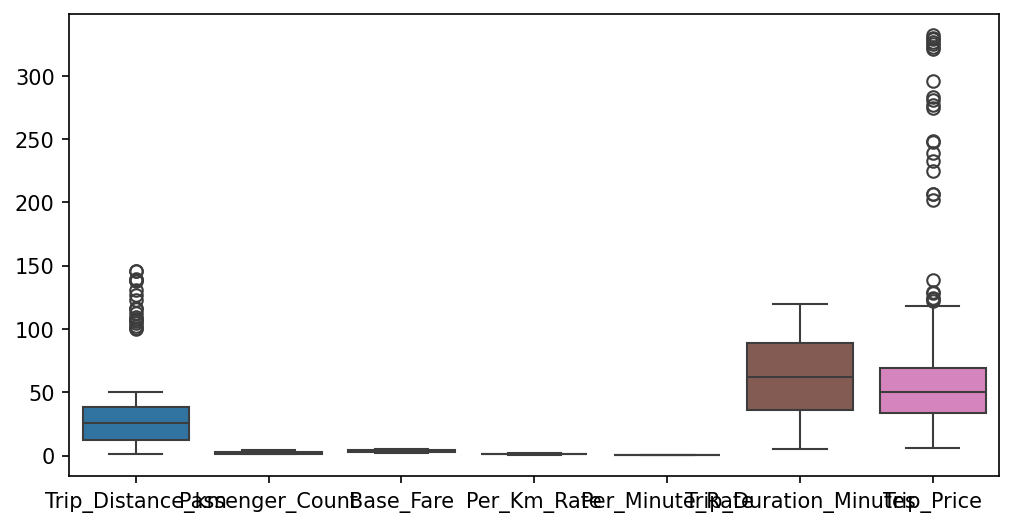

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(8,4), dpi=150)
sns.boxplot(df)

<Axes: >

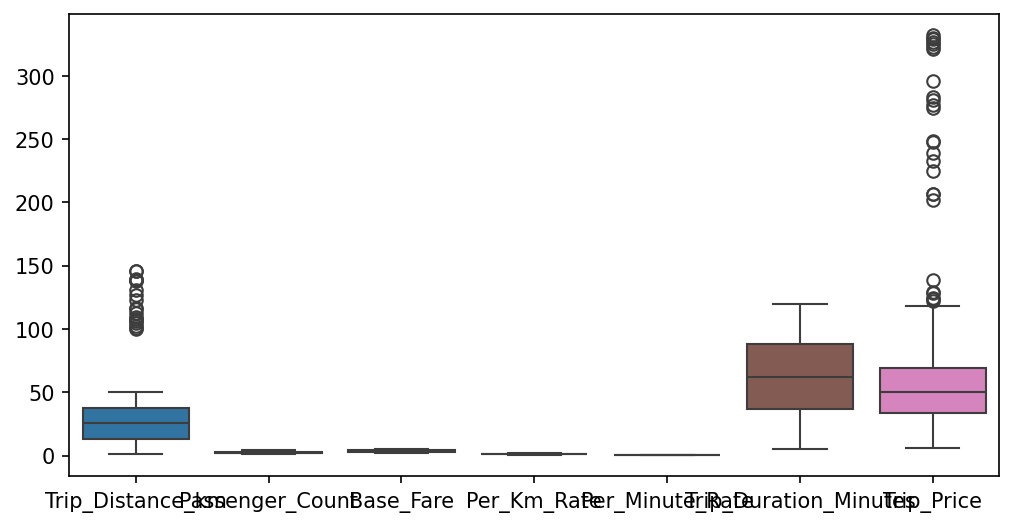

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(8,4), dpi=150)
sns.boxplot(df_clean)

## Remove outliers

Trip_Price 33.344 66.581
Trip_Distance_km 12.855 36.84


<Axes: >

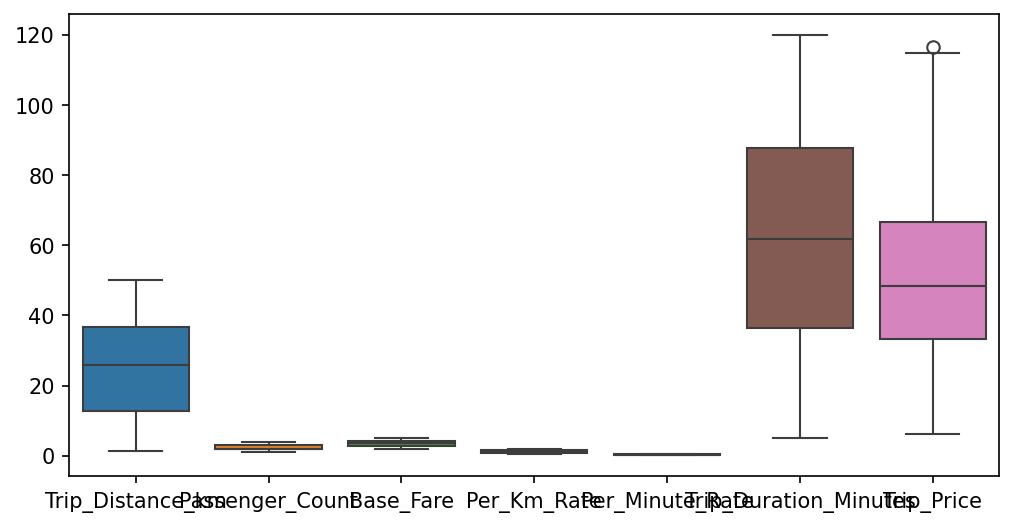

In [146]:
for col in ["Trip_Price", "Trip_Distance_km"]:

    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    print(col, Q1, Q3)
    # Behåll bara värden inom [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    df_clean = df_clean[
        (df_clean[col] >= lower_bound) &
        (df_clean[col] <= upper_bound)
    ]
plt.subplots(1, figsize=(8,4), dpi=150)
sns.boxplot(df_clean)

In [144]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       925 non-null    float64
 1   Time_of_Day            925 non-null    object 
 2   Day_of_Week            925 non-null    object 
 3   Passenger_Count        925 non-null    float64
 4   Traffic_Conditions     925 non-null    object 
 5   Weather                925 non-null    object 
 6   Base_Fare              925 non-null    float64
 7   Per_Km_Rate            925 non-null    float64
 8   Per_Minute_Rate        925 non-null    float64
 9   Trip_Duration_Minutes  925 non-null    float64
 10  Trip_Price             925 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.7+ KB
